## Observations and Insights 

In [1]:
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
Mouse_metadata_path = "Mouse_metadata.csv"
Study_results_path = "Study_results.csv"

# Read the mouse data and the study results
Mouse_metadata = pd.read_csv(Mouse_metadata_path)
Study_results = pd.read_csv(Study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(Mouse_metadata, Study_results, on="Mouse ID")

# Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
combine_data.shape

(1893, 8)

In [3]:
# Checking the number of mice.
len(combine_data["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_data[combine_data.duplicated(subset=["Mouse ID", "Timepoint"])] 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate = combine_data.loc[combine_data["Mouse ID"] == "g989"]
all_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
type(all_duplicate)
type(duplicate_mice)

pandas.core.frame.DataFrame

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_data.loc[combine_data["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_tumor_volume = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance_tumor_volume = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
SD_tumor_volume = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM_tumor_volume = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_statistics_df = pd.DataFrame({"Mean": mean_tumor_volume,
                                      "Median": median_tumor_volume,
                                      "Variance": variance_tumor_volume,
                                      "Standard Deviation": SD_tumor_volume,
                                      "Standard Error": SEM_tumor_volume
                                     })
summary_statistics_df




,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_statistics = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean', 'median', 'std', 'var', 'sem']})
summary_statistics


Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_number_mice = clean_df.groupby("Drug Regimen")["Mouse ID"].count()
total_number_mice


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Count of Mice')

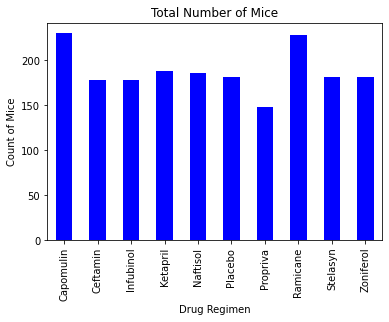

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
total_number_mice.plot(kind="bar", color="blue", title="Total Number of Mice")
plt.ylabel("Count of Mice")


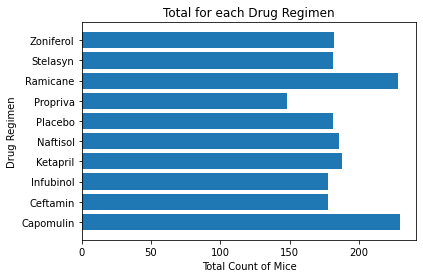

In [13]:
# Generate bar plot using pyplot
index = total_number_mice.index
plt.barh(index, total_number_mice)
plt.ylabel('Drug Regimen')
plt.xlabel('Total Count of Mice')
plt.title('Total for each Drug Regimen')
plt.show()

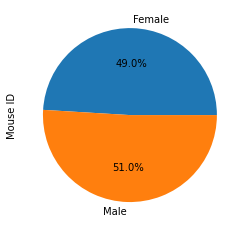

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#total_number_mice.plot(kind="pie", autopct="%1.1f%%")
distribution_by_gender = clean_df.groupby("Sex")["Mouse ID"].count()
distribution_by_gender.plot(kind="pie", autopct="%1.1f%%")
plt.show()

ValueError: 'explode' must be of length 'x'

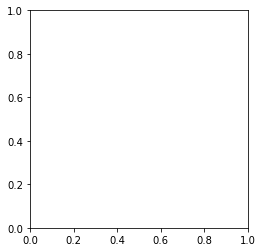

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#distribution_by_gender = clean_df.index
#plt.pie(distribution_by_gender, clean_df, autopct="%1.1f%%")
#plt.title("Distribution of female versus male mice")
#plt.show()
colors = ["red","blue"]
plt.figure()
plt.pie(distribution_by_gender.values, explode=explode, labels=distribution_by_gender.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = clean_df[(clean_df["Drug Regimen"] == "Capomulin") | 
                          (clean_df["Drug Regimen"] == "Ramicane") | 
                          (clean_df["Drug Regimen"] == "Infubinol") | 
                          (clean_df["Drug Regimen"] == "Ceftamin")]

final_tumor_volume = final_tumor_volume[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
final_tumor_volume = final_tumor_volume.groupby(["Mouse ID", "Drug Regimen"])
regimen = final_tumor_volume["Tumor Volume (mm3)"].sum().to_frame()
regimen_plot = regimen["Tumor Volume (mm3)"]
regimen.head()

quartiles = regimen_plot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Tumor Volume (mm3) is: 340.0010610275
The upper quartile of Tumor Volume (mm3) is: 449.98455965499994
The interquartile range of Tumor Volume (mm3) is: 109.98349862749996
The the median of Tumor Volume (mm3) is: 394.845840265 
Values below 175.02581308625005 could be outliers.
Values above 614.9598075962499 could be outliers.


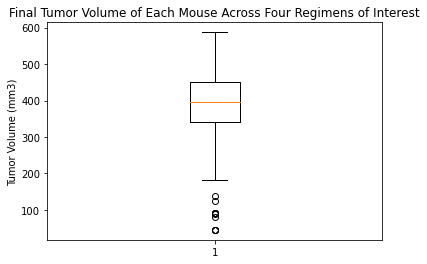

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse Across Four Regimens of Interest")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(regimen_plot)
plt.show()

## Line and Scatter Plots

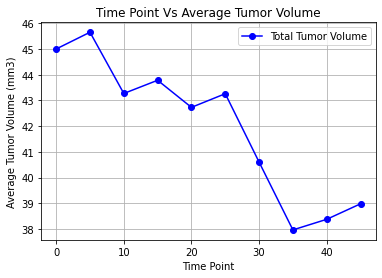

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumor_volume = clean_df[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "b128")]
tumor_volume = tumor_volume.groupby(["Drug Regimen", "Timepoint"])
tumor_df = tumor_volume["Tumor Volume (mm3)"].mean().to_frame()
tumor_data_df = tumor_df.unstack(0)
tumor_plot = tumor_data_df["Tumor Volume (mm3)"]

xAxis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.figure()
tumor_total, = plt.plot(xAxis, tumor_plot["Capomulin"], marker= "o", color="blue", label="Total Tumor Volume" )
plt.legend(handles=[tumor_total], loc="best")
plt.title("Time Point Vs Average Tumor Volume")
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

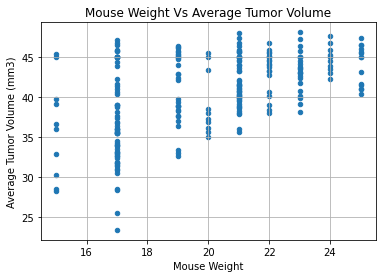

In [39]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter = clean_df[(clean_df["Drug Regimen"] == "Capomulin")]
scatter = scatter[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
combine_group = scatter.groupby(["Mouse ID","Weight (g)"])
scatter_data = combine_group["Tumor Volume (mm3)"].mean().to_frame()
scatter_data = scatter_data.reset_index()
scatter_data.head()
plt.figure()
scatter.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")
plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatter_data["Weight (g)"], scatter_data["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


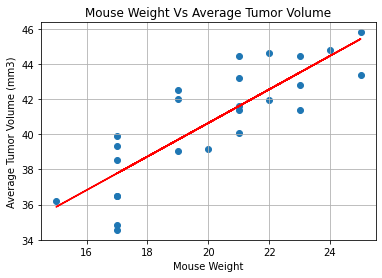

In [43]:
xvalue = scatter_data["Weight (g)"]
yvalue = scatter_data["Tumor Volume (mm3)"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalue, yvalue)
regression = xvalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regression,"r-")

plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()